In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

la frequenza di taglio attesa è 13968.336182079953 Hz


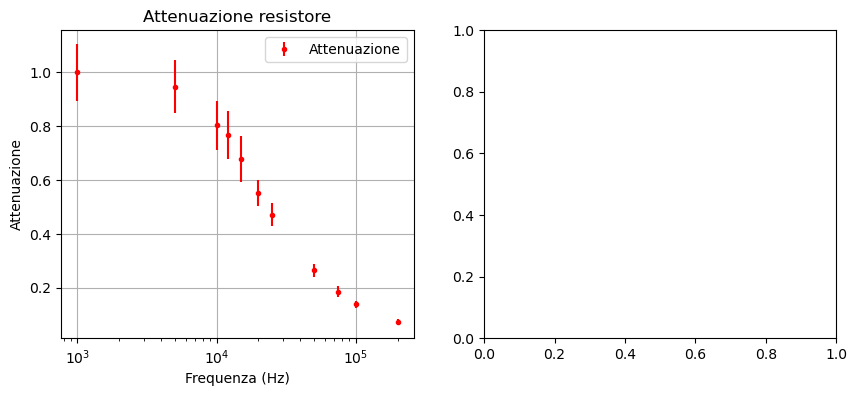

In [29]:
#resistenza, capacità e frequenza di taglio attesa
R = 6742 #Ohm
C = 1.690*10**(-9) #F
F0exp = 1/(R*C*2*np.pi)
print("la frequenza di taglio attesa è {} Hz".format(F0exp))

#frequenze
F = np.array([1000, 5000, 10000, 12000, 15000, 20000, 25000, 50000, 75000, 100000, 200000])

#V in entrata
Vin = np.array([5.4, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.5, 5.6, 5.6])
errVinp = np.array([5,5,5,5,5,5,5,5,5,5,5])
errVin = errVinp*(2/25)

#V in uscita
Vout = np.array([5.4, 5.3, 4.5, 4.3, 3.8, 3.08, 2.64, 1.48, 1.02, 0.77, 0.41])
errVoutp = np.array([5,5,5,5,5,2,2,1,1,0.5,0.5])
errVout = errVoutp*(2/25)

#Attenuazione
A = Vout/Vin
errA = A*np.sqrt((errVin/Vin)**2+(errVout/Vout)**2)


#Grafico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Grafico: attenuazione
axes[0].errorbar(F, A, yerr = errA, label='Attenuazione', fmt = 'o', markersize = 3, color='red')
axes[0].set_title('Attenuazione resistore')
axes[0].set_xlabel('Frequenza (Hz)')
axes[0].set_ylabel('Attenuazione')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)


In [31]:
#fit attenuazione
def Ac(F, F0):
    return 1 / np.sqrt(1 + (F / F0)**2)
least_squares = LeastSquares(F, A, errA, Ac)
m = Minuit(least_squares, F0 = F0exp)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.5427 (χ²/ndof = 0.1)     │              Nfcn = 17               │
│ EDM = 2.12e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  13.8e3   │   0.6e3   │   -0.6e3   │   0.6e3    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.6e3   │   0.6e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 3.53e+05 │
└────┴──────────┘

Text(0, 0.5, 'Attenuazione')

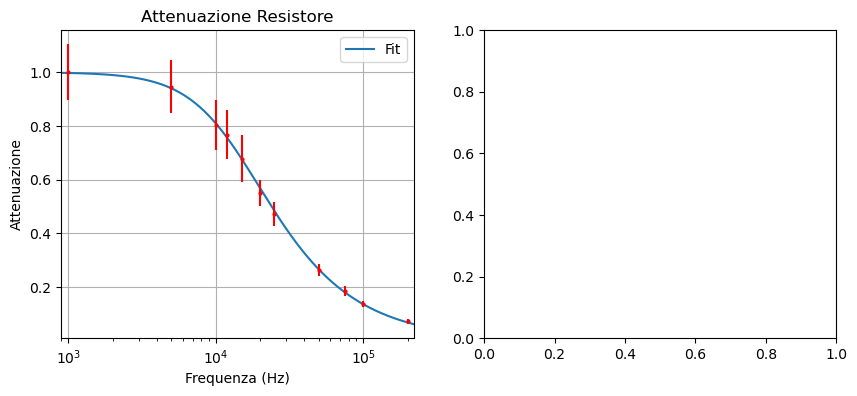

In [33]:
figg, axess = plt.subplots(1, 2, figsize=(10, 4))
F0a = m.values[0]
errF0a = m.errors[0]
x = np.linspace(min(F)*0.9,max(F)*1.1,max(F)-min(F))
#attenuazione
axess[0].plot(x,Ac(x,F0a), label = 'Fit')
axess[0].set_title('Attenuazione Resistore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'o', color ='red', markersize = 2)
axess[0].set_xlim(min(F)*0.9,max(F)*1.1)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")

In [35]:
#Risultati
print("F0 attenuazione condensatore {} +/- {}".format(F0a,errF0a))
#consistenza
test2 = abs((F0a - F0exp)/errF0a)
print("F0a e F0exp consistenti entro {} sigma".format(test2))


F0 attenuazione condensatore 13826.549992855698 +/- 594.5548074048412
F0a e F0exp consistenti entro 0.23847454844934113 sigma
